# Walmart Sales Data Analysis

### Introduction
This project analyzes Walmart sales data to uncover insights into product categories, sales trends, and profitability.  
The goal is to identify which categories perform best, how sales change over time, and provide recommendations to improve business performance.

### Objectives
- Understand which product categories generate the most revenue.
- Identify seasonal or monthly sales trends.
- Analyze profitability and growth patterns.
- Provide actionable recommendations for business strategy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 CHECKING THE DATA STRUCTURE


In [2]:
df=pd.read_csv('sales_data.csv', encoding="latin1")
df.shape
df.columns
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


CLEANING AND PREPARING DATA :

The dataset was already clean it had no duplicates or missing values.The main issue was that the "Order Date" and "Ship Date" was in String format.I have converted it into datetime format and extracted Year,Months to make Sales Analysis easier

In [3]:
print(df["Order Date"].head(20))
print(df["Order Date"].unique()[:50])

0     11-08-2016
1     11-08-2016
2     06-12-2016
3     10-11-2015
4     10-11-2015
5     06-09-2014
6     06-09-2014
7     06-09-2014
8     06-09-2014
9     06-09-2014
10    06-09-2014
11    06-09-2014
12     4/15/2017
13    12-05-2016
14    11/22/2015
15    11/22/2015
16    11-11-2014
17     5/13/2014
18     8/27/2014
19     8/27/2014
Name: Order Date, dtype: object
['11-08-2016' '06-12-2016' '10-11-2015' '06-09-2014' '4/15/2017'
 '12-05-2016' '11/22/2015' '11-11-2014' '5/13/2014' '8/27/2014'
 '12-09-2016' '7/16/2017' '9/25/2015' '1/16/2016' '9/17/2015' '10/19/2017'
 '12-08-2016' '12/27/2015' '09-10-2017' '7/17/2016' '9/19/2017'
 '03-11-2016' '10/20/2014' '6/20/2016' '4/18/2015' '12-11-2016'
 '6/17/2016' '11/24/2015' '4/30/2015' '12-05-2014' '06-04-2016'
 '9/18/2016' '9/14/2017' '4/26/2015' '12-09-2017' '11/26/2014'
 '10-12-2014' '09-03-2015' '11/13/2017' '5/28/2017' '10/26/2017'
 '04-05-2016' '9/17/2016' '1/31/2015' '11-06-2017' '11-09-2017'
 '6/17/2017' '09-06-2016' '8/29/2016' '1

In [18]:
mask_slash_order = df["Order Date"].astype(str).str.contains("/", na=False)

df.loc[mask_slash_order, "Order Date"] = pd.to_datetime(
    df.loc[mask_slash_order, "Order Date"], format="%m/%d/%Y", errors="coerce"
)

df.loc[~mask_slash_order, "Order Date"] = pd.to_datetime(
    df.loc[~mask_slash_order, "Order Date"], format="%d-%m-%Y", errors="coerce"
)

df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")  

print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [19]:
mask_slash_ship = df["Ship Date"].astype(str).str.contains("/", na=False)

df.loc[mask_slash_ship, "Ship Date"] = pd.to_datetime(
    df.loc[mask_slash_ship, "Ship Date"], format="%m/%d/%Y", errors="coerce"
)

df.loc[~mask_slash_ship, "Ship Date"] = pd.to_datetime(
    df.loc[~mask_slash_ship, "Ship Date"], format="%d-%m-%Y", errors="coerce"
)

df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")  

print(df.dtypes)



Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [5]:
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Analysis of the Dataset


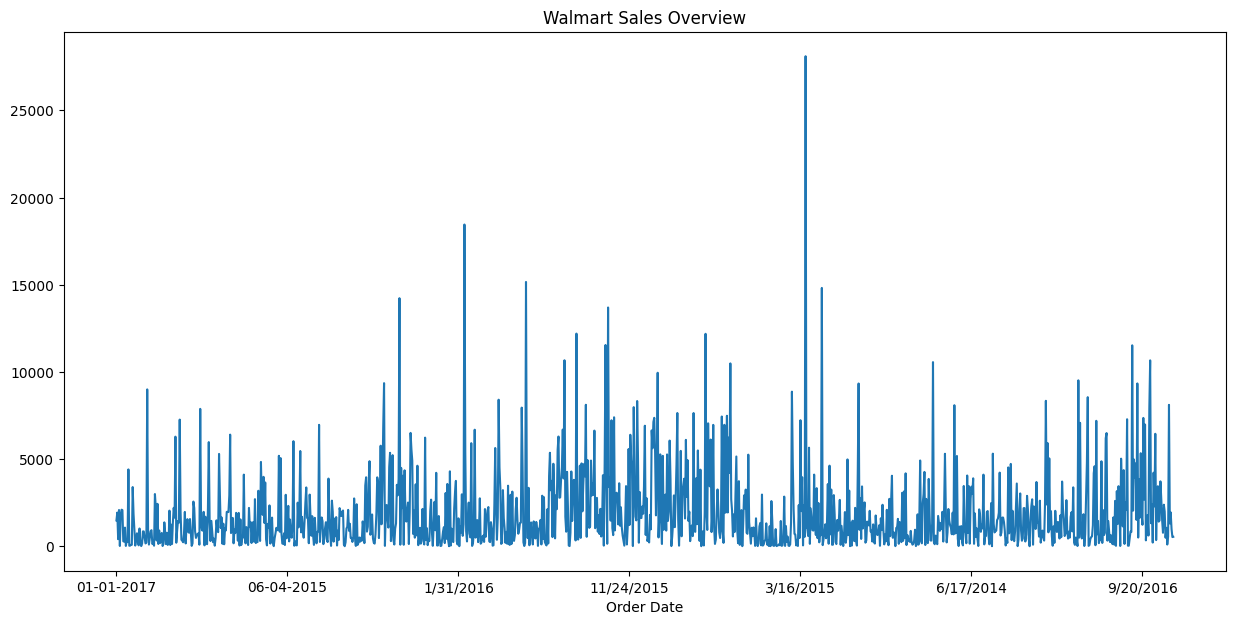

In [6]:
sales_trends=df.groupby("Order Date")["Sales"].sum()
sales_trends.plot(figsize=(15,7),title="Walmart Sales Overview")
plt.xticks(rotation=360)
plt.show()

Most profitable States

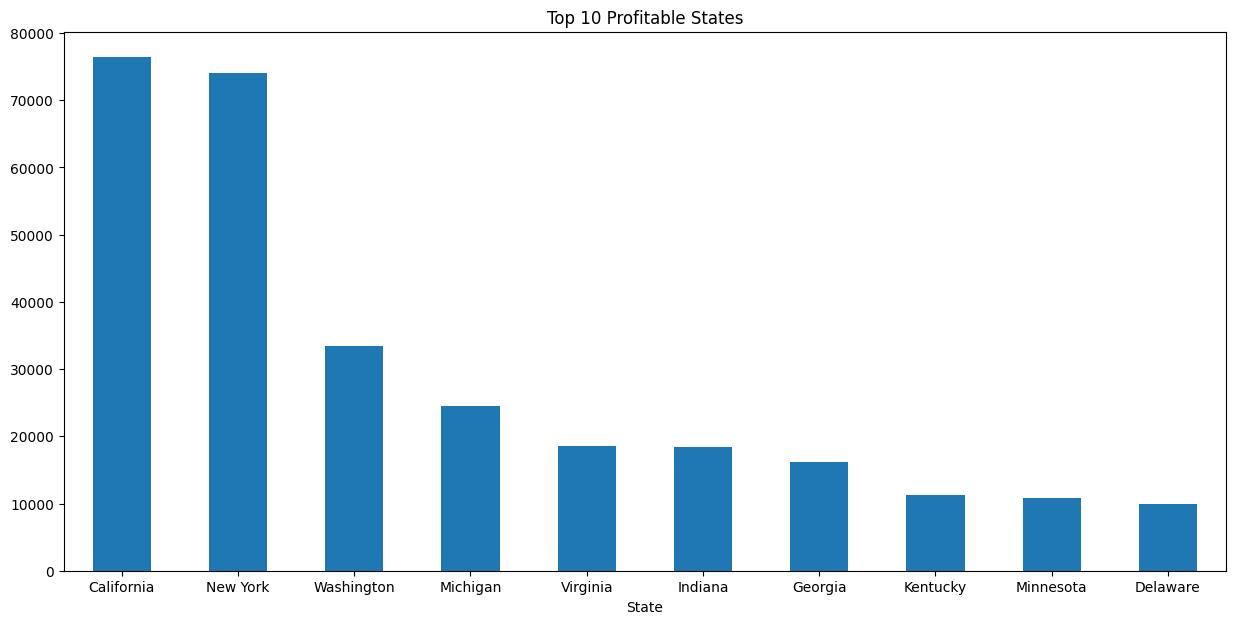

In [7]:
state_profit=df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10)
state_profit.plot(kind="bar",figsize=(15,7),title="Top 10 Profitable States")
plt.xticks(rotation=360)
plt.show()

Insight:California emerged to be the most profitable state with respect to the amount of sales done 

Category & Subcategory


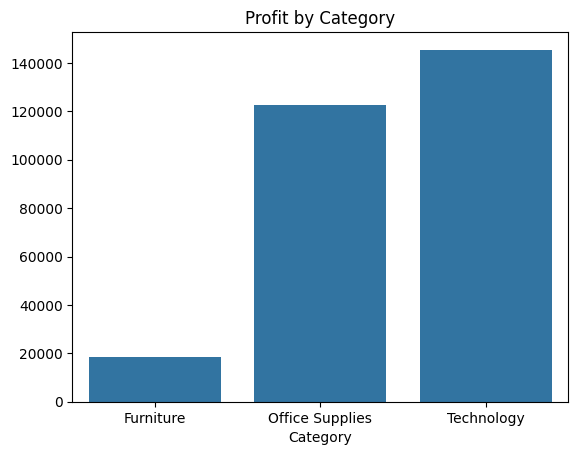

In [8]:
category_profit=df.groupby("Category")["Profit"].sum()
sns.barplot(x=category_profit.index,y=category_profit.values)
plt.title("Profit by Category")
plt.show()

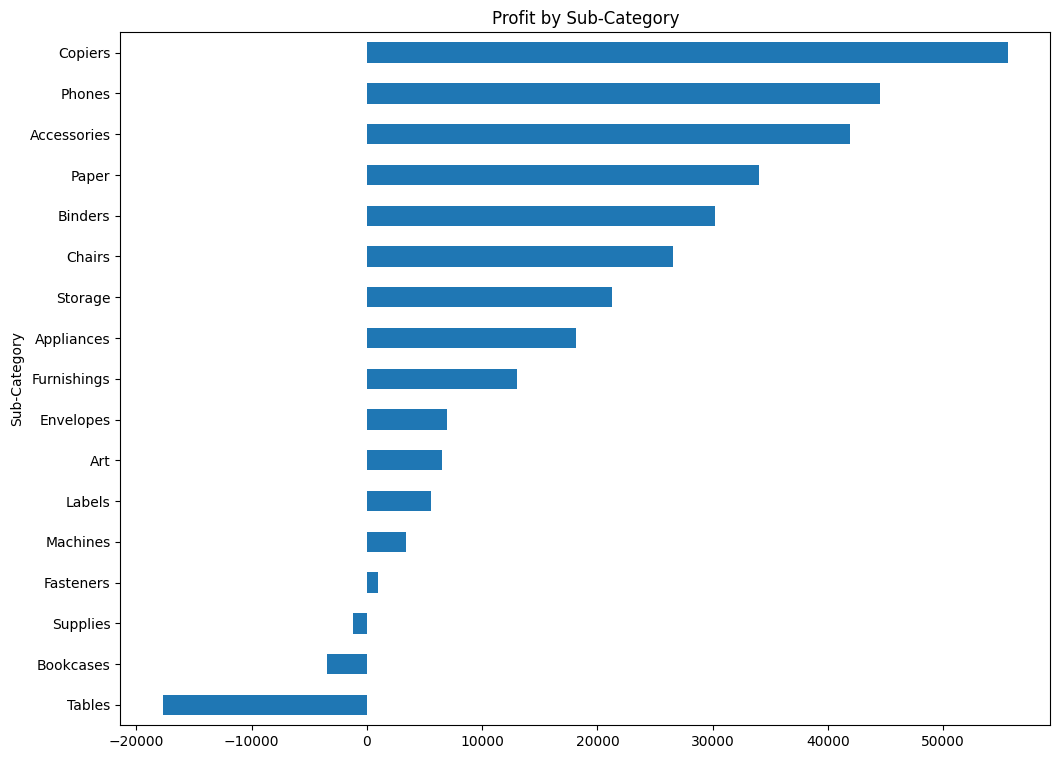

In [9]:
subcategory_profit=df.groupby("Sub-Category")["Profit"].sum().sort_values()
subcategory_profit.plot(kind="barh",figsize=(12,9),title="Profit by Sub-Category")
plt.show()

Insight: Copiers were the top selling products followed by mobile phones and furniture products like table,bookcase where the least selling products out of the total sales done 

Impact of Discounted products on profit

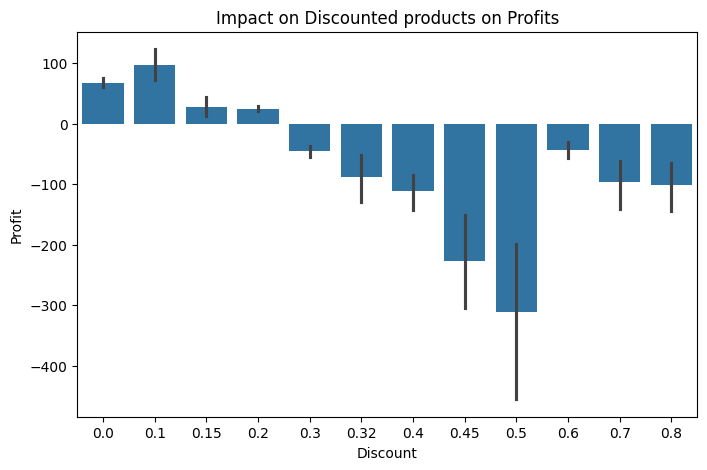

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Discount",y="Profit")
plt.title("Impact on Discounted products on Profits")
plt.show()

Insight : Discounted products often kills the profit margins

Monthwise Sales comparisions


Best Month for Sales: November with sales of 271693.7525


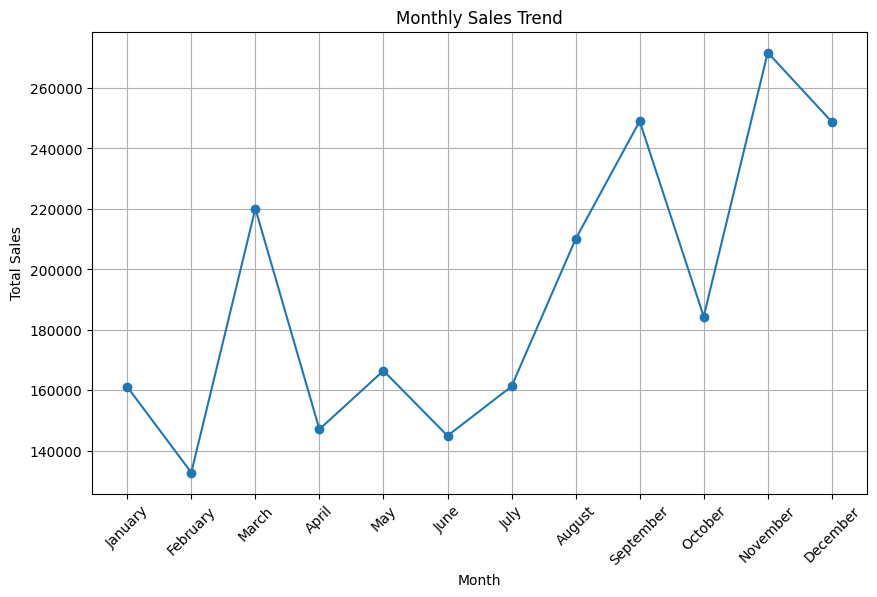

In [20]:

df['Order Date'] = pd.to_datetime(df['Order Date'])


df['Month_Num'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')


monthly_sales = df.groupby(['Month_Num', 'Month'])['Sales'].sum().reset_index()

best_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
print("Best Month for Sales:", best_month['Month'], "with sales of", best_month['Sales'])

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Insight :November emegered as the month with most Sales likely due to upcoming  holidays season and Walmart should run more promotions on Tech products

Shipping mode Analysis


In [21]:
ship_count=df['Ship Mode'].value_counts()
print(ship_count)

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


Sales and Profit by Shipping Mode

In [22]:
ship_summary=df.groupby('Ship Mode').agg({
    'Sales':'sum',
    'Profit':'sum',
    'Order ID':'count'    
}).reset_index()
ship_summary.rename(columns={'Order ID':'Number of Orders'}, inplace = True)
print(ship_summary)

        Ship Mode         Sales       Profit  Number of Orders
0     First Class  3.514284e+05   48969.8399              1538
1        Same Day  1.283631e+05   15891.7589               543
2    Second Class  4.591936e+05   57446.6354              1945
3  Standard Class  1.358216e+06  164088.7875              5968


Average Order profitability

In [26]:
ship_summary['Avg Profit per Order']=ship_summary['Profit']/ship_summary['Number of Orders']


C:\Users\nayan\AppData\Local\Temp\ipykernel_17044\2079508335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_summary, x='Ship Mode', y='Sales', palette='Blues_d')


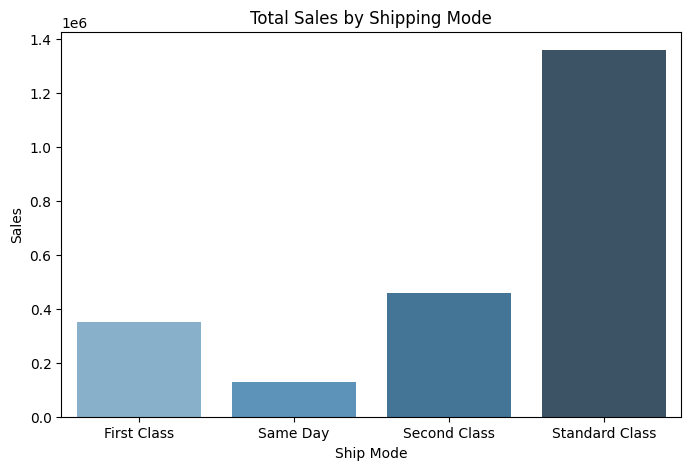

C:\Users\nayan\AppData\Local\Temp\ipykernel_17044\2079508335.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_summary, x='Ship Mode', y='Profit', palette='Greens_d')


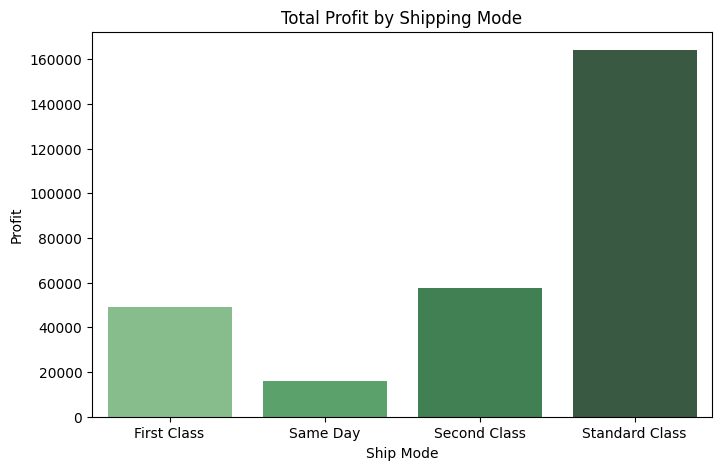

C:\Users\nayan\AppData\Local\Temp\ipykernel_17044\2079508335.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_summary, x='Ship Mode', y='Avg Profit per Order', palette='Oranges_d')


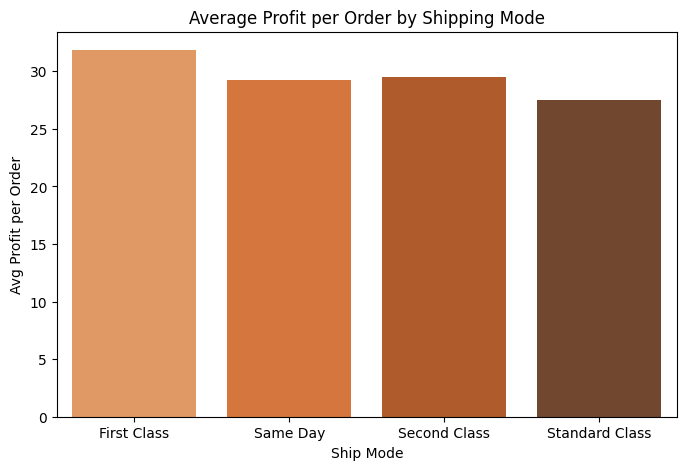

In [28]:
# Sales by Ship Mode
plt.figure(figsize=(8,5))
sns.barplot(data=ship_summary, x='Ship Mode', y='Sales', palette='Blues_d')
plt.title('Total Sales by Shipping Mode')
plt.show()

# Profit by Ship Mode
plt.figure(figsize=(8,5))
sns.barplot(data=ship_summary, x='Ship Mode', y='Profit', palette='Greens_d')
plt.title('Total Profit by Shipping Mode')
plt.show()

# Average Profit per Order
plt.figure(figsize=(8,5))
sns.barplot(data=ship_summary, x='Ship Mode', y='Avg Profit per Order', palette='Oranges_d')
plt.title('Average Profit per Order by Shipping Mode')
plt.show()

Insight : While Standard Class contributed the highest total profit due to the volume of order, First Class order generated the highest average profit per order. This suggest that Walmart should consider promoting faster shipping options to high value customers as they are likely to spend more per order